<a href="https://colab.research.google.com/github/erendagasan/Eren-Dagasan-Personal/blob/main/ichimoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the stock symbol (e.g., AAPL): kontr.ıs
[*********************100%%**********************]  1 of 1 completed
Initial Balance: $10,000
Final Balance: $20.06

Transactions:
('Buy', Timestamp('2020-12-30 00:00:00'), 4.548468112945557)
('Sell', Timestamp('2021-03-30 00:00:00'), 12.513047218322754)
('Buy', Timestamp('2021-06-01 00:00:00'), 13.816686630249023)
('Sell', Timestamp('2021-06-16 00:00:00'), 12.398859024047852)
('Buy', Timestamp('2021-06-29 00:00:00'), 14.273436546325684)
('Sell', Timestamp('2021-07-13 00:00:00'), 12.037264823913574)
('Buy', Timestamp('2021-09-10 00:00:00'), 12.750937461853027)
('Sell', Timestamp('2021-09-29 00:00:00'), 11.609062194824219)
('Buy', Timestamp('2021-10-22 00:00:00'), 13.43606185913086)
('Sell', Timestamp('2021-12-20 00:00:00'), 12.341765403747559)
('Buy', Timestamp('2022-01-05 00:00:00'), 13.569280624389648)
('Sell', Timestamp('2022-06-24 00:00:00'), 29.498437881469727)
('Buy', Timestamp('2022-08-05 00:00:00'), 32.86697006225586)
('Sell', Times

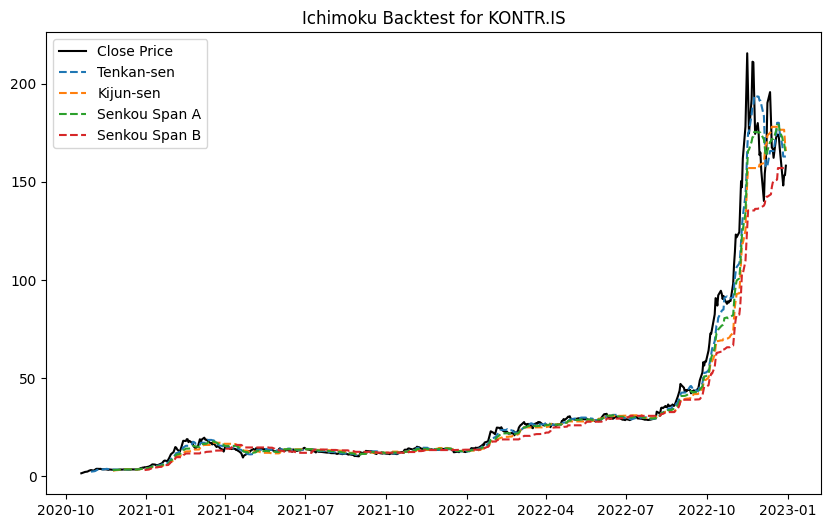

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_ichimoku(data):
    # Calculate Ichimoku indicators: Tenkan-sen, Kijun-sen, Senkou Span A, Senkou Span B, and Chikou Span
    data['tenkan_sen'] = (data['High'].rolling(window=9).max() + data['Low'].rolling(window=9).min()) / 2
    data['kijun_sen'] = (data['High'].rolling(window=26).max() + data['Low'].rolling(window=26).min()) / 2
    data['senkou_span_a'] = (data['tenkan_sen'] + data['kijun_sen']) / 2
    data['senkou_span_b'] = (data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2
    data['chikou_span'] = data['Close'].shift(-26)  # 26 periods behind

def backtest_strategy(data, initial_balance=10000):
    balance = initial_balance
    position = 0  # 0: no position, 1: long, -1: short
    transactions = []

    for i in range(26, len(data)):
        if data['tenkan_sen'][i] > data['kijun_sen'][i] and data['Close'][i] > data['senkou_span_a'][i] and data['Close'][i] > data['senkou_span_b'][i]:
            # Ichimoku Buy Signal
            if position != 1:
                position = 1
                buy_price = data['Close'][i]
                transactions.append(('Buy', data.index[i], buy_price))
        elif data['tenkan_sen'][i] < data['kijun_sen'][i] and data['Close'][i] < data['senkou_span_a'][i] and data['Close'][i] < data['senkou_span_b'][i]:
            # Ichimoku Sell Signal
            if position != -1:
                position = -1
                sell_price = data['Close'][i]
                transactions.append(('Sell', data.index[i], sell_price))

    # Close any open position at the end
    if position == 1:
        sell_price = data['Close'].iloc[-1]
        transactions.append(('Sell', data.index[-1], sell_price))
    elif position == -1:
        buy_price = data['Close'].iloc[-1]
        transactions.append(('Buy', data.index[-1], buy_price))

    # Calculate final balance
    final_balance = balance + sum([t[2] - initial_balance if t[0] == 'Buy' else initial_balance - t[2] for t in transactions])

    return final_balance, transactions

def main(stock_symbol):
    # Download data
    data = yf.download(stock_symbol, start="2018-01-01", end="2023-01-01")

    # Calculate Ichimoku indicators
    calculate_ichimoku(data)

    # Backtest the strategy
    final_balance, transactions = backtest_strategy(data)

    # Display results
    print(f"Initial Balance: $10,000")
    print(f"Final Balance: ${final_balance:.2f}")
    print("\nTransactions:")
    for transaction in transactions:
        print(transaction)

    # Plot the closing price and Ichimoku indicators
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price', color='black')
    plt.plot(data['tenkan_sen'], label='Tenkan-sen', linestyle='--')
    plt.plot(data['kijun_sen'], label='Kijun-sen', linestyle='--')
    plt.plot(data['senkou_span_a'], label='Senkou Span A', linestyle='--')
    plt.plot(data['senkou_span_b'], label='Senkou Span B', linestyle='--')
    plt.legend()
    plt.title(f"Ichimoku Backtest for {stock_symbol}")
    plt.show()

if __name__ == "__main__":
    stock_symbol = input("Enter the stock symbol (e.g., AAPL): ").upper()
    main(stock_symbol)
